# Numpy - First Neural Network

In [1]:
# Package imports
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generating a dataset

In [22]:
import sklearn.datasets

## Perceptron

https://en.wikipedia.org/wiki/Perceptron

![perceptron](https://miro.medium.com/max/1400/1*xcEOFhZLyyo3uxzAt6KndQ.png)



**Model:**

In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input $ \mathbf {x}$  (a real-valued vector) to an output value $ f(\mathbf {x} )$ (a single binary value):

$ f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}} $


where $ \mathbf {w} $  is a vector of real-valued weights, $ \mathbf {w} \cdot \mathbf {x} $ is the dot product ${\displaystyle \sum _{i=1}^{m}w_{i}x_{i}} $, where m is the number of inputs to the perceptron, and b is the bias. 



**Learning algorithm:**

1. Initialize the weights. Weights may be initialized to 0 or to a small random value
2. For each example *j* in our training set *D*, perform the following steps over the input $ \mathbf {x} _{j}$ and desired output $ d_{j}$

    a. Calculate the actual output:

$\begin{aligned}y_{j}(t)&=f[\mathbf {w} (t)\cdot \mathbf {x} _{j}]\\&=f[w_{0}(t)x_{j,0}+w_{1}(t)x_{j,1}+w_{2}(t)x_{j,2}+\dotsb +w_{n}(t)x_{j,n}]\end{aligned}$

    b. Update the weights:
${\displaystyle w_{i}(t+1)=w_{i}(t)\;{\boldsymbol {+}}\;r\cdot (d_{j}-y_{j}(t))x_{j,i}}$, for all features ${\displaystyle 0\leq i\leq n}$, $\displaystyle r$ is the learning rate.



In [32]:
def activation(x):
    return np.where( x > 0 , 1, 0)

In [33]:
x = np.linspace(-5, 5)

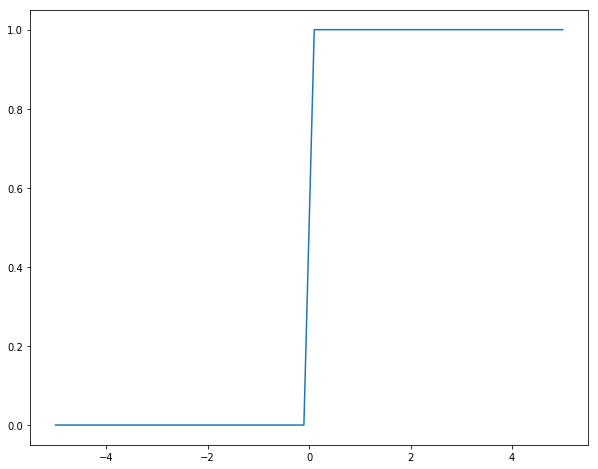

In [34]:
plt.plot(x, activation(x))

In [81]:
def perceptron(w, x):
    return activation(np.dot(x, w))

In [36]:
import time
from IPython import display

In [37]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

### Train model

In [38]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) - 1 

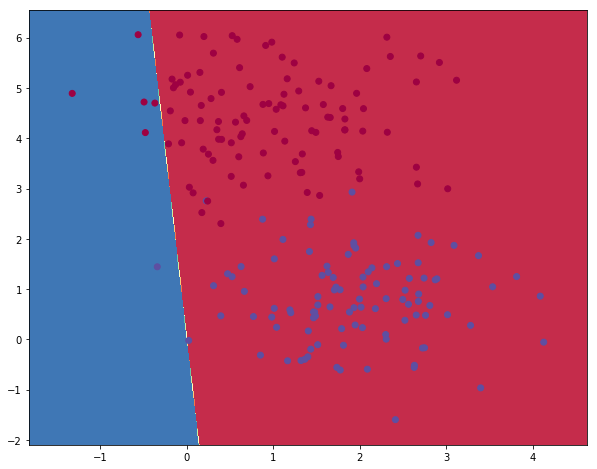

In [39]:
plot_decision_boundary(lambda x: perceptron(w, x))

In [40]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [41]:
perceptron(w, X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [42]:
y - perceptron(w, X)

array([ 1,  1,  1,  1,  0,  0,  0,  0,  1, -1,  1,  1,  0,  0,  1,  0,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,
        0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1, -1, -1,  1,
        0, -1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,
        0,  0, -1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  0,
        0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,
        0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,
        1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0])

In [43]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) - 1 

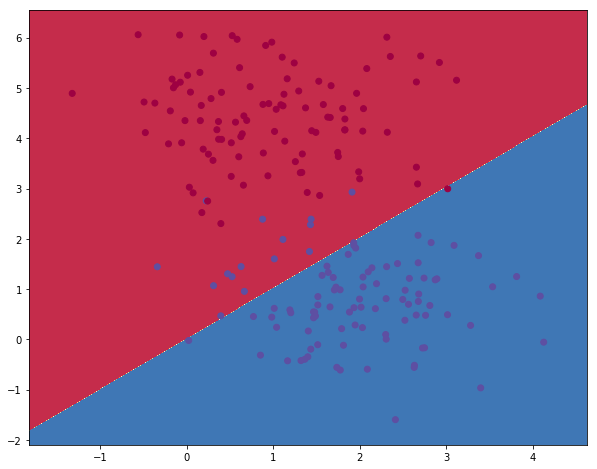

'Error:0.08'

In [82]:
LR = 1
for j in range(5):
    # get preds
    pred = perceptron(w, X)
    
    # how much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))
    

    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(error))
    time.sleep(0.5)
    
    # update weights
    w = w + LR * np.dot(X.T, diff)

---

## Homework


Can you make a perfect classifier? Let's consider the next dataset:

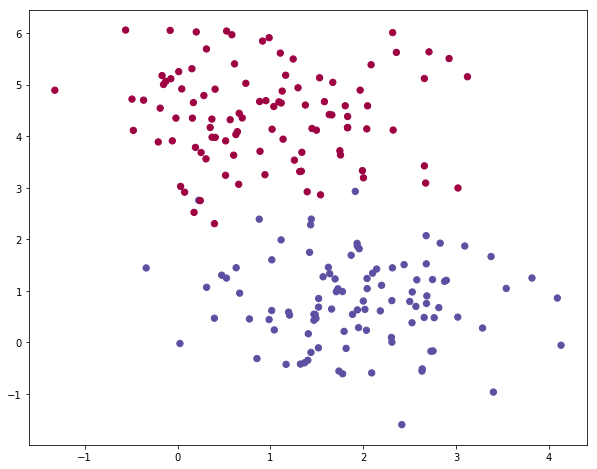

In [45]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

#### 1. Try to tune learning rate and number of iterations
* What is the lowest error with current approach?*

In [46]:
y 

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [47]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) -1 # -1 is the old one

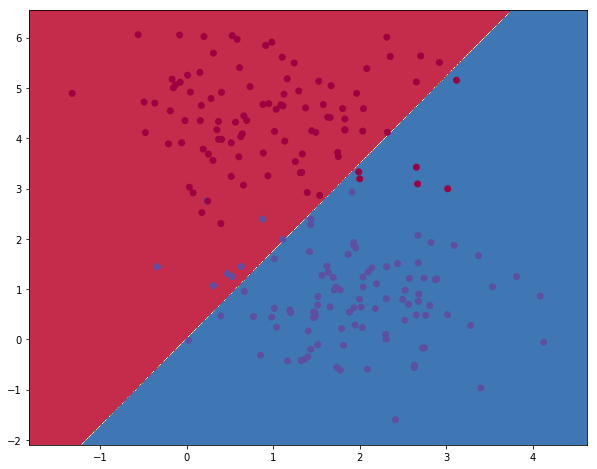

'Error:0.07'

'Iteration: 99'

0.065


In [48]:
LR = .1 #Going to start with larger steps and then decrease them as we go (0.1, 0.01, 0.001)
errors = []
for j in range(100):
    # get preds
    pred = perceptron(w, X)
    
    # how much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))
    errors.append(error)

    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(error))
    display.display("Iteration: " + str(j))
    time.sleep(0.5)
    
    # update weights
    w = w + LR * np.dot(X.T, diff) 

print(min(errors))

### Answer: The lowest error with the current approach is 0.065

#### 2. It's time to add learnable bias
* What is the lowest error now?*

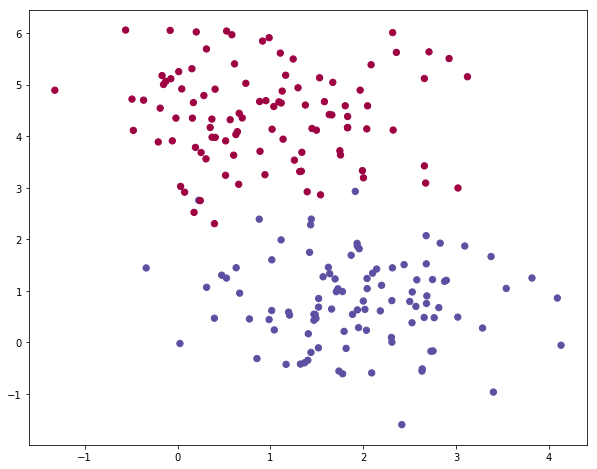

In [89]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

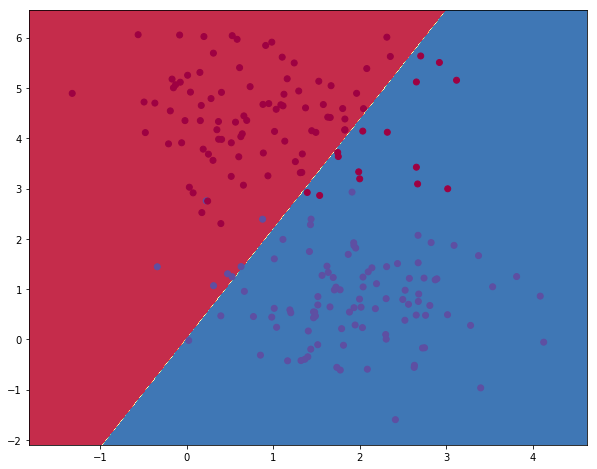

'Error:0.11'

'Iteration: 999'

'Bias: 15.675834001300924'

0.06


In [90]:
#initialize weights 
w = 2*np.random.random((2,)) -1 # -1 is the old one

#initialize a bias term
bias = np.random.rand()

LR = .01 #Going to start with larger steps and then decrease them as we go (0.1, 0.01, 0.001)
errors = []
biases = []
for j in range(1000):
    # get preds
    pred = perceptron(w, X)
    
    # how much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))
    errors.append(error)
    biases.append(bias)

    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(error))
    display.display("Iteration: " + str(j))
    display.display('Bias: ' + str(bias))
    time.sleep(0.5)
    
    #updated bias
    bias = bias + LR * np.sum(diff) #tuning the bias 

    
    # update weights
    w = w + LR * (np.dot(X.T, diff) + bias) #adding bias to the weights 

print(min(errors))

#### 3*. Let's expand it for three classes

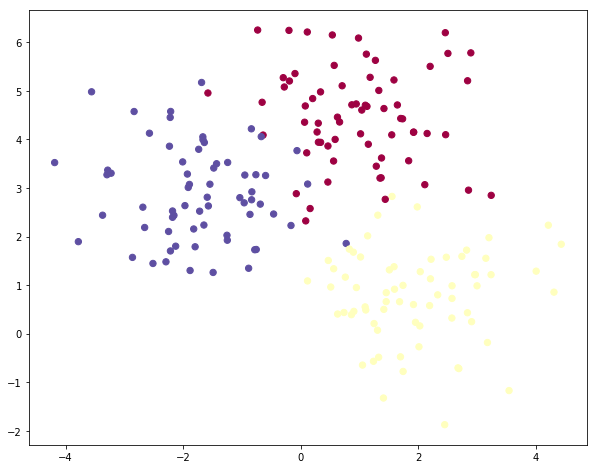

In [91]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

**Idea:** we need to train weights for each class 

\begin{equation}
y_p =   \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{p}^T \mathbf{w}_c^{\,}.
\end{equation}


Epoch 0, Loss: 1.0032388063065205
Epoch 100, Loss: 0.5823398019826661
Epoch 200, Loss: 0.45461142524694104
Epoch 300, Loss: 0.38787309429436007
Epoch 400, Loss: 0.34604610991271767
Epoch 500, Loss: 0.3170019061714211
Epoch 600, Loss: 0.2954594804018705
Epoch 700, Loss: 0.27872892879560646
Epoch 800, Loss: 0.2652868280358619
Epoch 900, Loss: 0.25420150157932925


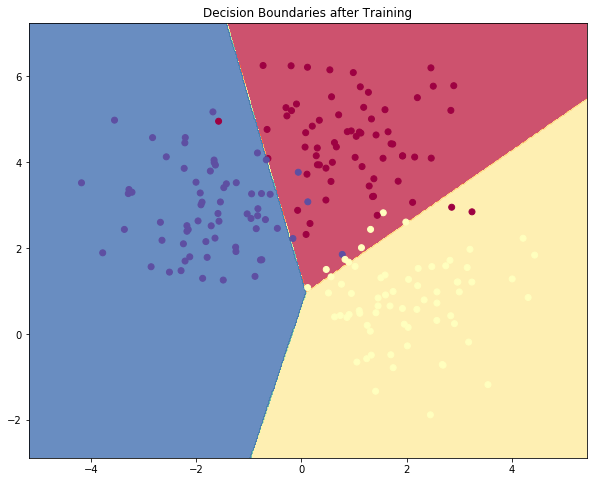

In [98]:
from sklearn.preprocessing import OneHotEncoder

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Add a bias term to X
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights and bias for each class
n_classes = len(np.unique(y))
w = np.random.rand(X_with_bias.shape[1], n_classes)



# Learning rate
LR = 0.01

# Training loop
epochs = 1000
for j in range(epochs):
    
    # prediction using softmax activation 
    logits = np.dot(X_with_bias, w) #the dot product between X_with_bias and the weights 
    exp_logits = np.exp(logits) 
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Compute categorical cross-entropy loss
    loss = -np.sum(y_one_hot * np.log(softmax_probs)) / len(X)

    # Update weights based on the gradient of the loss
    gradient = np.dot(X_with_bias.T, (softmax_probs - y_one_hot)) / len(X)
    w = w - LR * gradient

    # Print the loss for every 100 epochs
    if j % 100 == 0:
        print(f'Epoch {j}, Loss: {loss}')

# Plot the decision boundaries
plt.contourf(xx, yy, predictions_meshgrid.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Decision Boundaries after Training')
plt.show()